# Disaster Tweet Analyzer
This notebook aims to analyze tweets related to disasters, classify them, and prepare the dataset for machine learning model development.

## Introduction
The purpose of this project is to build a model that can predict whether a tweet indicates a real disaster or not. We will start by loading the dataset, performing initial data exploration, and then cleaning the data before moving on to preprocessing steps such as tokenization, stopword removal, and lemmatization.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## 2. Load the Dataset
Load the dataset containing tweets. The dataset was chosen based on criteria such as the number of tweets and data quality.

In [3]:
# Step 1: Load the dataset
data_file_path = 'tweets.csv'  # Assuming you uploaded 'tweets.csv' directly to Colab
df = pd.read_csv(data_file_path)
print(df.head())

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  


## 3. Data Exploration
Initial exploration of the dataset to understand its structure and check for any missing values.

In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None


In [5]:
# Check for missing values in the dataset
print("\nMissing values before cleanup:")
print(df.isnull().sum())


Missing values before cleanup:
id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


In [6]:
tweets_df=df
tweets_df['location'].fillna('Unknown', inplace=True)
df.dropna(subset=['keyword', 'text'], inplace=True)

<ipython-input-6-9c8731839eb9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tweets_df['location'].fillna('Unknown', inplace=True)


## 4. Data Cleaning
Remove any unnecessary characters, punctuation, or special symbols from the text data.

In [7]:
# Cleaning the text data by removing special characters and numbers
def clean_text(text):
    # Remove URLs and mentions but keep words in any language
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    # Keep alphabets from any language, numbers and spaces; remove everything else
    text = re.sub(r'[^A-Za-z0-9가-힣\s]', '', text)  # This includes Korean characters
    return text.lower()  # Convert to lowercase to maintain consistency

# Dropping the 'id' column from the dataset
tweets_df = tweets_df.drop(columns=['id'])

tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)
tweets_df.head()

keyword        location                                               text  \
0  ablaze         Unknown  Communal violence in Bhainsa, Telangana. "Ston...   
1  ablaze         Unknown  Telangana: Section 144 has been imposed in Bha...   
2  ablaze   New York City  Arsonist sets cars ablaze at dealership https:...   
3  ablaze  Morgantown, WV  Arsonist sets cars ablaze at dealership https:...   
4  ablaze         Unknown  "Lord Jesus, your love brings freedom and pard...   

   target                                       cleaned_text  
0       1  communal violence in bhainsa telangana stones ...  
1       1  telangana section 144 has been imposed in bhai...  
2       1           arsonist sets cars ablaze at dealership   
3       1          arsonist sets cars ablaze at dealership    
4       0  lord jesus your love brings freedom and pardon...

## 6. Conclusion and Next Steps
The dataset has been loaded and cleaned. Initial visualizations provided insights into the data distribution. In the next steps, we will proceed with tokenization, stopword removal, and lemmatization to fully preprocess the text data.

In [8]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


### Tokenization

In [9]:
# Download the 'punkt' resource
nltk.download('punkt')
tweets_df['tokens'] = tweets_df['cleaned_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
# Display the first few rows to check tokenization
tweets_df[['cleaned_text', 'tokens']].head()

cleaned_text  \
0  communal violence in bhainsa telangana stones ...   
1  telangana section 144 has been imposed in bhai...   
2           arsonist sets cars ablaze at dealership    
3          arsonist sets cars ablaze at dealership     
4  lord jesus your love brings freedom and pardon...   

                                              tokens  
0  [communal, violence, in, bhainsa, telangana, s...  
1  [telangana, section, 144, has, been, imposed, ...  
2     [arsonist, sets, cars, ablaze, at, dealership]  
3     [arsonist, sets, cars, ablaze, at, dealership]  
4  [lord, jesus, your, love, brings, freedom, and...

### StopWord Removal

In [11]:

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Load stopwords set
stopwords = set(stopwords.words('english'))

# Removing stopwords from the tokenized data
tweets_df['tokens'] = tweets_df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stopwords])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# Checking a few examples to ensure stopwords are removed
print(tweets_df['tokens'].head())

0    [communal, violence, bhainsa, telangana, stone...
1    [telangana, section, 144, imposed, bhainsa, ja...
2           [arsonist, sets, cars, ablaze, dealership]
3           [arsonist, sets, cars, ablaze, dealership]
4    [lord, jesus, love, brings, freedom, pardon, f...
Name: tokens, dtype: object


### Stemming

In [13]:
stemmer = PorterStemmer()
# Apply stemming to each token
tweets_df['stemmed'] = tweets_df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
# Check some examples
print(tweets_df[['tokens', 'stemmed']].head())


                                              tokens  \
0  [communal, violence, bhainsa, telangana, stone...   
1  [telangana, section, 144, imposed, bhainsa, ja...   
2         [arsonist, sets, cars, ablaze, dealership]   
3         [arsonist, sets, cars, ablaze, dealership]   
4  [lord, jesus, love, brings, freedom, pardon, f...   

                                             stemmed  
0  [commun, violenc, bhainsa, telangana, stone, p...  
1  [telangana, section, 144, impos, bhainsa, janu...  
2            [arsonist, set, car, ablaz, dealership]  
3            [arsonist, set, car, ablaz, dealership]  
4  [lord, jesu, love, bring, freedom, pardon, fil...  


## 5. Exploratory Data Analysis
Visualize the distribution of disaster and non-disaster tweets to gain insights.

### Data Visualization

<ipython-input-14-10b91be57abf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')


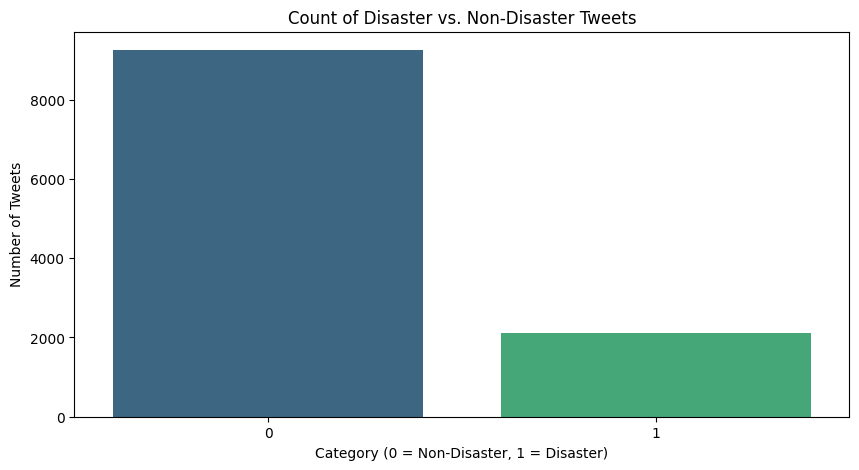

In [14]:
# Plot the number of disaster and non-disaster tweets
disaster_counts = tweets_df['target'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
plt.title('Count of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Category (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

#### Most Common Keywords in Disaster Tweets

In [15]:
# Finding the most common keywords in disaster-related tweets
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
disaster_tweets = tweets_df[tweets_df['target'] == 1]['cleaned_text']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-15-1d88e0905b8b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


In [16]:
tweets_df.head()

keyword        location                                               text  \
0  ablaze         Unknown  Communal violence in Bhainsa, Telangana. "Ston...   
1  ablaze         Unknown  Telangana: Section 144 has been imposed in Bha...   
2  ablaze   New York City  Arsonist sets cars ablaze at dealership https:...   
3  ablaze  Morgantown, WV  Arsonist sets cars ablaze at dealership https:...   
4  ablaze         Unknown  "Lord Jesus, your love brings freedom and pard...   

   target                                       cleaned_text  \
0       1  communal violence in bhainsa telangana stones ...   
1       1  telangana section 144 has been imposed in bhai...   
2       1           arsonist sets cars ablaze at dealership    
3       1          arsonist sets cars ablaze at dealership     
4       0  lord jesus your love brings freedom and pardon...   

                                              tokens  \
0  [communal, violence, bhainsa, telangana, stone...   
1  [telangana, section, 144, imposed, bhainsa, ja...   
2         [arsonist, sets, cars, ablaze, dealership]   
3         [arsonist, sets, cars, ablaze, dealership]   
4  [lord, jesus, love, brings, freedom, pardon, f...   

                                             stemmed  
0  [commun, violenc, bhainsa, telangana, stone, p...  
1  [telangana, section, 144, impos, bhainsa, janu...  
2            [arsonist, set, car, ablaz, dealership]  
3            [arsonist, set, car, ablaz, dealership]  
4  [lord, jesu, love, bring, freedom, pardon, fil...

# Text Classification Pipeline
This notebook demonstrates a complete workflow for handling an imbalanced text dataset. We'll preprocess the text using TF-IDF, apply SMOTE-ENN for class balancing, and visualize the results.

## Step 1: Feature and Target Extraction
In this step, we extract the features (text) and target labels from the dataset.

In [17]:

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from collections import Counter

# Step 1: Prepare Features and Target
# Extracting features (text) and the target column from the dataset
X = tweets_df['text']  # Text data (features)
y = tweets_df['target']  # Target column


## Step 2: TF-IDF Vectorization
We'll apply Term Frequency-Inverse Document Frequency (TF-IDF) to convert the text into numerical features. This representation helps capture the importance of words relative to the entire corpus.

In [18]:
# Step 2: Apply TF-IDF Vectorization
# TF-IDF helps convert text to numerical data based on the importance of each word
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

In [19]:
# Step 2.1: Apply PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

In [20]:
# Initialize PCA with the desired number of components (e.g., 100)
pca = PCA(n_components=100, random_state=42)

In [21]:
# Fit and transform the TF-IDF features
X_reduced = pca.fit_transform(X_tfidf.toarray())  # Convert to dense array if necessary

## Step 3: Data Splitting
The dataset is split into training and test sets. We'll use a 70/30 split with a random state for reproducibility.

In [22]:
# Step 3: Split the data into training and test sets
# Use X_reduced instead of X_tfidf for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

## Step 4: Class Distribution Visualization
We visualize the original class distribution in the training data. Since this is an imbalanced dataset, we expect one class to dominate.

In [23]:

# Step 4: Visualize the original class distribution
def plot_class_distribution(y, title):
    """Visualize the class distribution with a bar plot"""
    counter = Counter(y)
    plt.bar(counter.keys(), counter.values(), color=['blue', 'orange'])
    plt.title(title)
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Samples')
    plt.xticks([0, 1])  # Set x-axis labels to 0 and 1 (binary classification)
    plt.show()

print("Original class distribution:")
plot_class_distribution(y_train, 'Original Class Distribution')


Original class distribution:


## Step 5: Applying SMOTE-ENN
SMOTE (Synthetic Minority Over-sampling Technique) combined with ENN (Edited Nearest Neighbors) is applied to the training data. This technique helps balance the classes by generating synthetic samples of the minority class and cleaning noisy data.

In [24]:
# Step 5: Apply SMOTE-ENN on the training data
# SMOTE-ENN will handle imbalanced data by oversampling the minority class and cleaning noisy samples
smote_enn = SMOTEENN(random_state=42, sampling_strategy=.8)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

## Step 6: Visualizing Resampled Class Distribution
After applying SMOTE-ENN, we visualize the new class distribution to confirm that the classes are more balanced.

In [25]:
# Step 6: Visualize the resampled class distribution
print("Resampled class distribution:")
plot_class_distribution(y_resampled, 'Resampled Class Distribution (SMOTE-ENN)')

# Optional: Print exact numbers for further confirmation
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")

Resampled class distribution:


Original class distribution: Counter({0: 6448, 1: 1511})
Resampled class distribution: Counter({1: 4460, 0: 4180})


# Model Training and Evaluation with Logistic Regression

In this section, we will train a Logistic Regression model to classify tweets as disaster-related or not. After training the model, we’ll evaluate its performance using a confusion matrix and classification report.


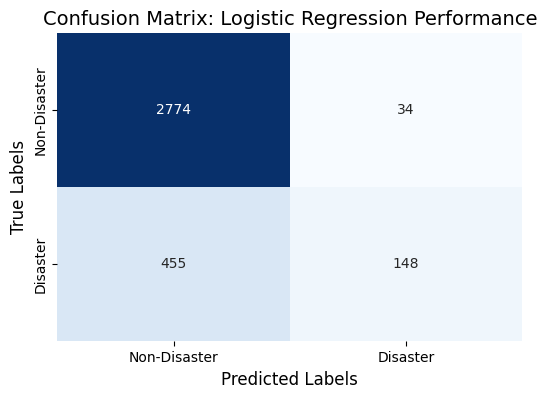

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2808
           1       0.81      0.25      0.38       603

    accuracy                           0.86      3411
   macro avg       0.84      0.62      0.65      3411
weighted avg       0.85      0.86      0.82      3411



In [26]:
# Import required libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Instantiate the Logistic Regression model
# The max_iter parameter is set to 200 to ensure the model has enough iterations to converge
model = LogisticRegression(max_iter=200)

# Step 2: Train (fit) the model on the training dataset
# X_train and y_train should be the features and target variable from your training set
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
# This will generate predictions based on the model’s learned parameters
y_pred = model.predict(X_test)

# Function to plot a confusion matrix as a heatmap for better visualization
def plot_confusion_matrix(y_true, y_pred, title):
    """
    Plots a confusion matrix as a heatmap.

    Parameters:
    - y_true: array-like, ground truth (actual) labels.
    - y_pred: array-like, predicted labels from the model.
    - title: str, title for the plot.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap using seaborn for visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Disaster', 'Disaster'],
                yticklabels=['Non-Disaster', 'Disaster'])

    # Add titles and labels to the plot
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.show()

# Step 4: Visualize the confusion matrix
# This function call will display the matrix, helping us see how well the model performs
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix: Logistic Regression Performance')

# Step 5: Print the classification report
# The classification report provides precision, recall, and F1-score for each class
print("Classification Report:\n", classification_report(y_test, y_pred))


In [28]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

# Logistic Regression (Already implemented)
lr_accuracy = accuracy_score(y_test, y_pred)


# Create a table to display accuracy results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, knn_accuracy, svm_accuracy, rf_accuracy, xgb_accuracy]
})

results_df

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:15:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model  Accuracy
0  Logistic Regression  0.884198
1                  KNN  0.861038
2                  SVM  0.851070
3        Random Forest  0.881853
4              XGBoost  0.884198